#Importing Dataset

#Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Projelerim\\Meyve_Sebze_Tanima\\Meyve_sebze\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Projelerim\\Meyve_Sebze_Tanima\\Meyve_sebze\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [4]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


98/98 [==============================] - 53s 495ms/step - loss: 7.5576 - accuracy: 0.0266 - val_loss: 3.5835 - val_accuracy: 0.0285
Epoch 2/32
98/98 [==============================] - 45s 440ms/step - loss: 3.5819 - accuracy: 0.0244 - val_loss: 3.5824 - val_accuracy: 0.0285
Epoch 3/32
98/98 [==============================] - 45s 439ms/step - loss: 3.5787 - accuracy: 0.0289 - val_loss: 3.5603 - val_accuracy: 0.0342
Epoch 4/32
98/98 [==============================] - 46s 450ms/step - loss: 3.5726 - accuracy: 0.0321 - val_loss: 3.5455 - val_accuracy: 0.0399
Epoch 5/32
98/98 [==============================] - 46s 457ms/step - loss: 3.5649 - accuracy: 0.0334 - val_loss: 3.5568 - val_accuracy: 0.0427
Epoch 6/32
98/98 [==============================] - 48s 476ms/step - loss: 3.5573 - accuracy: 0.0347 - val_loss: 3.5420 - val_accuracy: 0.0427
Epoch 7/32
98/98 [==============================] - 50s 493ms/step - loss: 3.5407 - accuracy: 0.0449 - val_loss: 3.5454 - val_accuracy: 0.03

##Evaluating Model

In [17]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 30s 292ms/step - loss: 1.2218 - accuracy: 0.6838
Training accuracy: 0.6837881207466125


In [18]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 4s 93ms/step - loss: 1.3838 - accuracy: 0.6895
Validation accuracy: 0.6894586682319641


##Saving Model

In [19]:
cnn.save('trained_model.keras')

In [20]:
training_history.history #Return Dictionary of history

{'loss': [7.557575702667236,
  3.5818657875061035,
  3.578660488128662,
  3.572587013244629,
  3.5648701190948486,
  3.557302951812744,
  3.5406854152679443,
  3.5347681045532227,
  3.5199360847473145,
  3.4960601329803467,
  3.473942279815674,
  3.442016839981079,
  3.4047088623046875,
  3.3505778312683105,
  3.305227041244507,
  3.268345832824707,
  3.173682689666748,
  3.106851100921631,
  3.032819986343384,
  2.9443342685699463,
  2.8814008235931396,
  2.7381796836853027,
  2.5931477546691895,
  2.546917676925659,
  2.442047119140625,
  2.2409937381744385,
  2.120201587677002,
  2.107400417327881,
  1.965508222579956,
  1.8262524604797363,
  1.7513900995254517,
  1.717895746231079],
 'accuracy': [0.026645265519618988,
  0.024398073554039,
  0.028892455622553825,
  0.03210273012518883,
  0.03338683769106865,
  0.03467094525694847,
  0.04494382068514824,
  0.04847512021660805,
  0.05104333907365799,
  0.0638844296336174,
  0.06195826828479767,
  0.07383627444505692,
  0.0863563418388

In [21]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [23]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 68.94586682319641 %


#Accuracy Visualization

##Training Visualization

In [24]:
#training_history.history['accuracy']

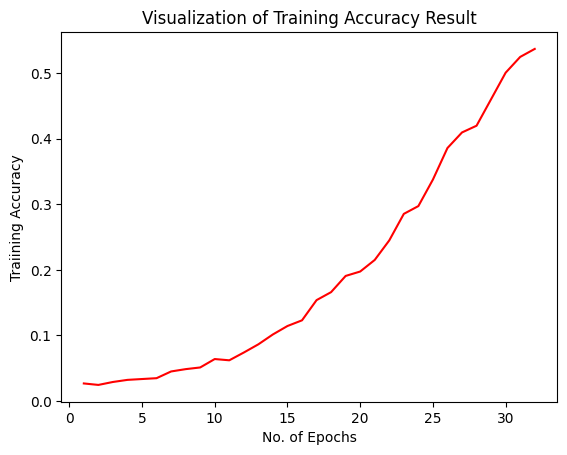

In [25]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

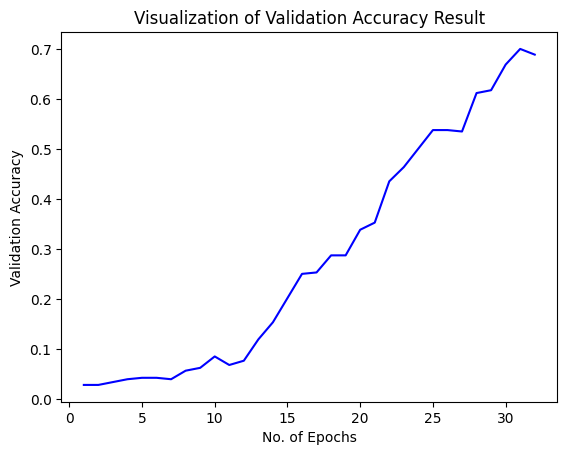

In [26]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()